# Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement:

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

# Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weather.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

# EDA:

In [3]:
df.shape

(8425, 23)

In [4]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [9]:
for i in df.columns:

        print(df[i].value_counts())
        print('__________________')

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
__________________
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
__________________
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
__________________
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
__________________
0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2     

In [10]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
emb=SimpleImputer(strategy="most_frequent")
df['WindGustDir']=emb.fit_transform(df['WindGustDir'].values.reshape(-1, 1))
df['WindDir9am']=emb.fit_transform(df['WindDir9am'].values.reshape(-1, 1))
df['WindDir3pm']=emb.fit_transform(df['WindDir3pm'].values.reshape(-1, 1))
df['RainToday']=emb.fit_transform(df['RainToday'].values.reshape(-1, 1))
df['RainTomorrow']=emb.fit_transform(df['RainTomorrow'].values.reshape(-1, 1))

In [12]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir         0
WindGustSpeed     991
WindDir9am          0
WindDir3pm          0
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday           0
RainTomorrow        0
dtype: int64

In [13]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

<AxesSubplot:>

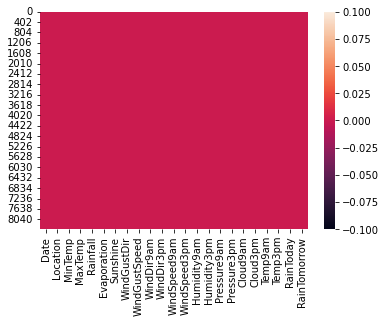

In [14]:
sns.heatmap(df.isnull())

In [15]:
df.nunique()

Date             3004
Location           12
MinTemp           286
MaxTemp           332
Rainfall          251
Evaporation       117
Sunshine          141
WindGustDir        16
WindGustSpeed      53
WindDir9am         16
WindDir3pm         16
WindSpeed9am       35
WindSpeed3pm       36
Humidity9am        91
Humidity3pm        95
Pressure9am       385
Pressure3pm       375
Cloud9am           10
Cloud3pm           10
Temp9am           305
Temp3pm           329
RainToday           2
RainTomorrow        2
dtype: int64

# Data Visualisation:

Univariate Analysis:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Albury'),
  Text(1, 0, 'CoffsHarbour'),
  Text(2, 0, 'Newcastle'),
  Text(3, 0, 'Penrith'),
  Text(4, 0, 'Williamtown'),
  Text(5, 0, 'Wollongong'),
  Text(6, 0, 'Melbourne'),
  Text(7, 0, 'Brisbane'),
  Text(8, 0, 'Adelaide'),
  Text(9, 0, 'PerthAirport'),
  Text(10, 0, 'Darwin'),
  Text(11, 0, 'Uluru')])

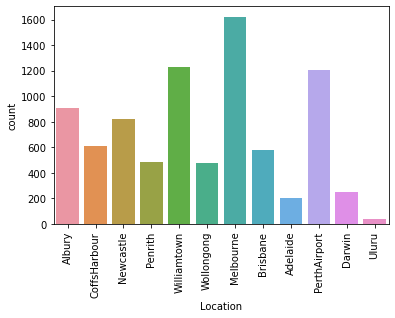

In [16]:
sns.countplot(df['Location'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

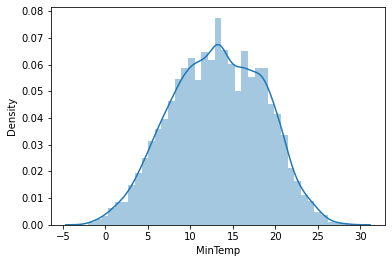

In [17]:
sns.distplot(df['MinTemp'])

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

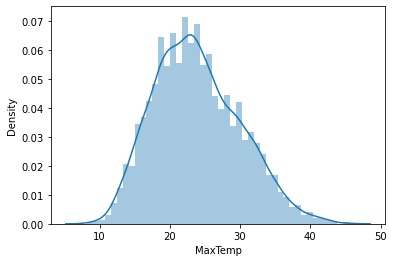

In [18]:
sns.distplot(df['MaxTemp'])

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

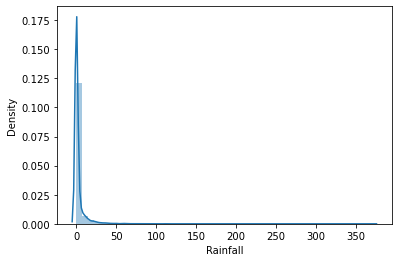

In [19]:
sns.distplot(df['Rainfall'])

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

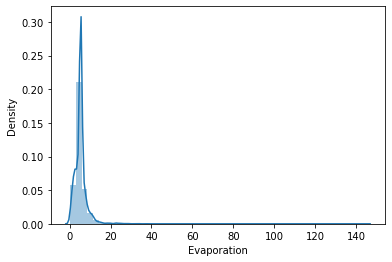

In [20]:
sns.distplot(df['Evaporation'])

<AxesSubplot:xlabel='Sunshine', ylabel='Density'>

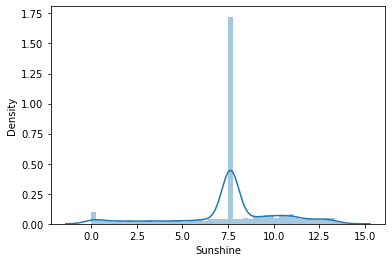

In [21]:
sns.distplot(df['Sunshine'])

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

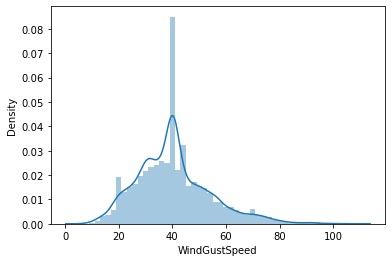

In [22]:
sns.distplot(df['WindGustSpeed'])

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

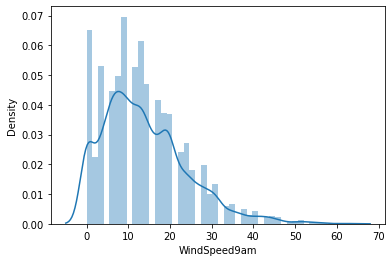

In [23]:
sns.distplot(df['WindSpeed9am'])

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

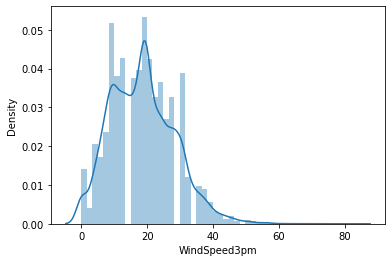

In [24]:
sns.distplot(df['WindSpeed3pm'])

<AxesSubplot:xlabel='Humidity9am', ylabel='Density'>

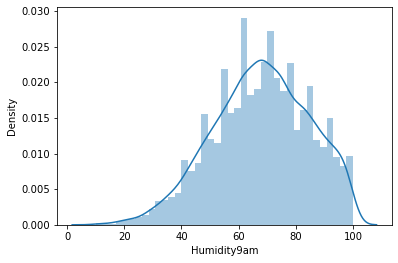

In [25]:
sns.distplot(df['Humidity9am'])

<AxesSubplot:xlabel='Humidity3pm', ylabel='Density'>

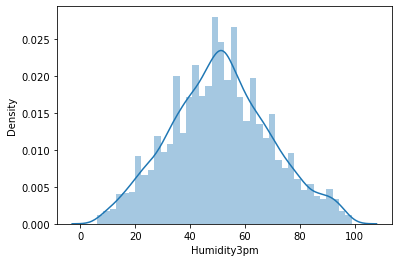

In [26]:
sns.distplot(df['Humidity3pm'])

<AxesSubplot:xlabel='Pressure9am', ylabel='Density'>

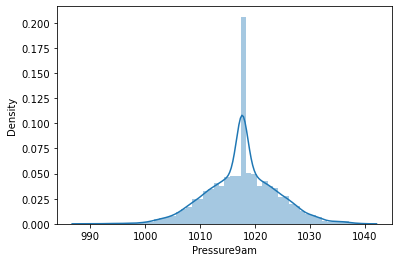

In [27]:
sns.distplot(df['Pressure9am'])

<AxesSubplot:xlabel='Pressure3pm', ylabel='Density'>

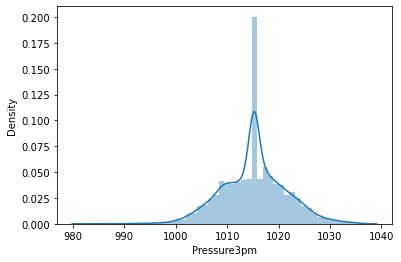

In [28]:
sns.distplot(df['Pressure3pm'])

<AxesSubplot:xlabel='Cloud9am', ylabel='Density'>

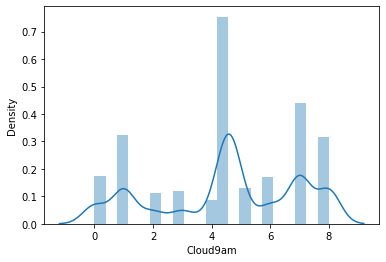

In [29]:
sns.distplot(df['Cloud9am'])

<AxesSubplot:xlabel='Cloud3pm', ylabel='Density'>

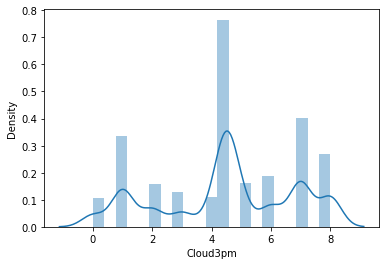

In [30]:
sns.distplot(df['Cloud3pm'])

<AxesSubplot:xlabel='Temp9am', ylabel='Density'>

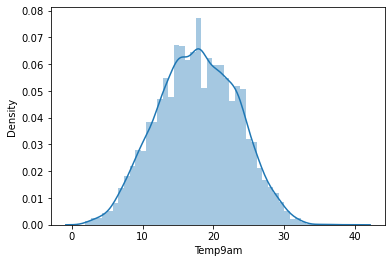

In [31]:
sns.distplot(df['Temp9am'])

<AxesSubplot:xlabel='Temp3pm', ylabel='Density'>

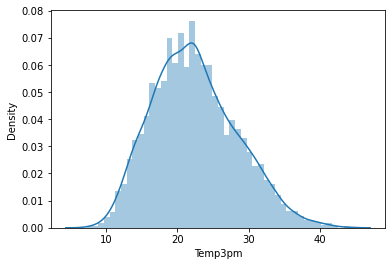

In [32]:
sns.distplot(df['Temp3pm'])

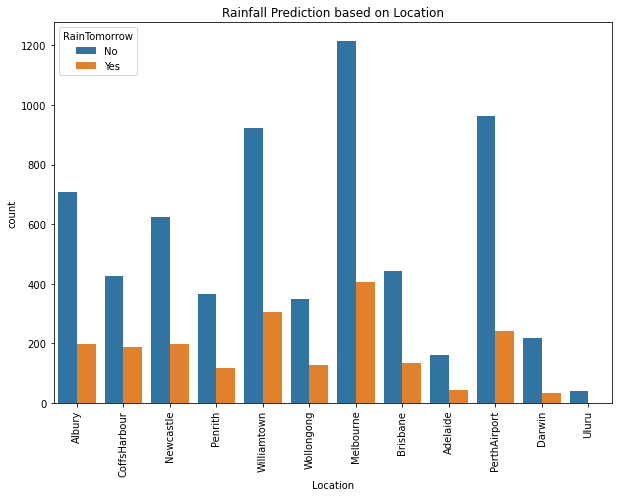

In [33]:
plt.figure(figsize = (10,7))
sns.countplot( df['Location'],hue=df['RainTomorrow'],data=df )
plt.xlabel('Location')
plt.title('Rainfall Prediction based on Location')
plt.xticks(rotation=90)
plt.show()

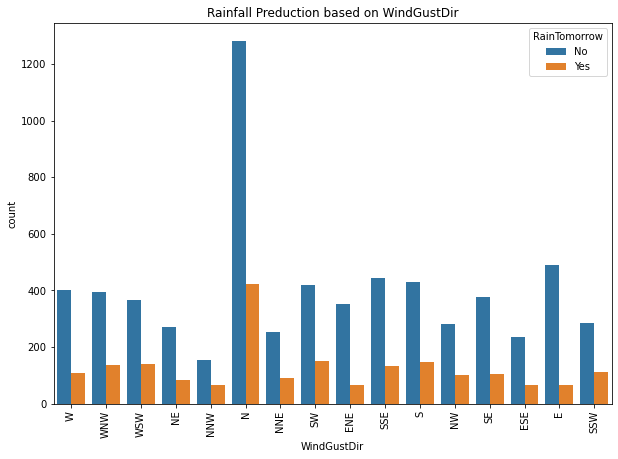

In [34]:
plt.figure(figsize = (10,7))
sns.countplot( df['WindGustDir'],hue=df['RainTomorrow'],data=df )
plt.xlabel('WindGustDir')
plt.title('Rainfall Preduction based on WindGustDir')
plt.xticks(rotation=90)
plt.show()

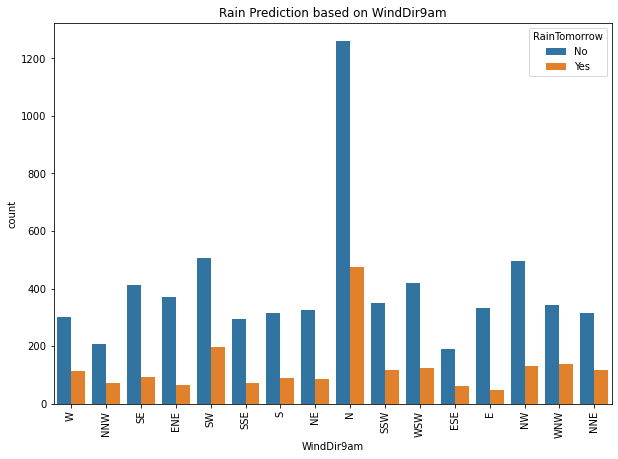

In [35]:
plt.figure(figsize = (10,7))
sns.countplot( df['WindDir9am'],hue=df['RainTomorrow'],data=df )
plt.xlabel('WindDir9am')
plt.xticks(rotation=90)
plt.title('Rain Prediction based on WindDir9am')
plt.show()

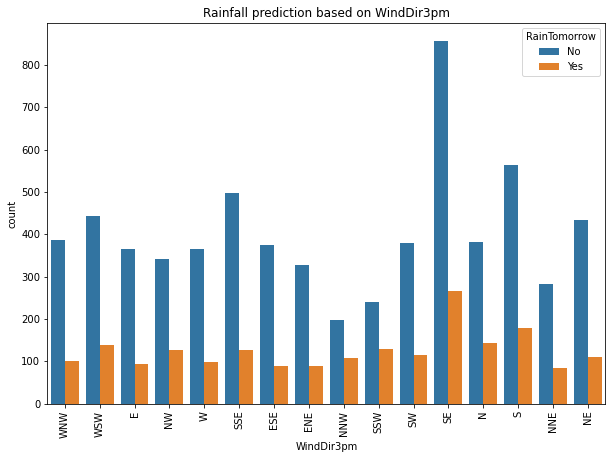

In [36]:
plt.figure(figsize = (10,7))
sns.countplot( df['WindDir3pm'],hue=df['RainTomorrow'],data=df )
plt.xlabel('WindDir3pm')
plt.xticks(rotation=90)
plt.title('Rainfall prediction based on WindDir3pm')
plt.show()

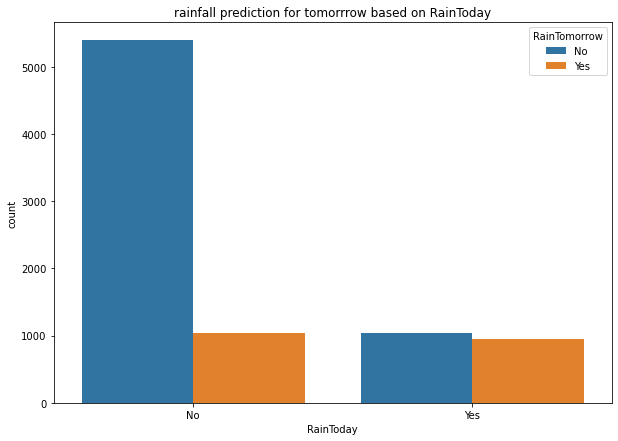

In [37]:
plt.figure(figsize = (10,7))
sns.countplot( df['RainToday'],hue=df['RainTomorrow'],data=df )
plt.xlabel('RainToday')
plt.title('rainfall prediction for tomorrrow based on RainToday')
plt.show()

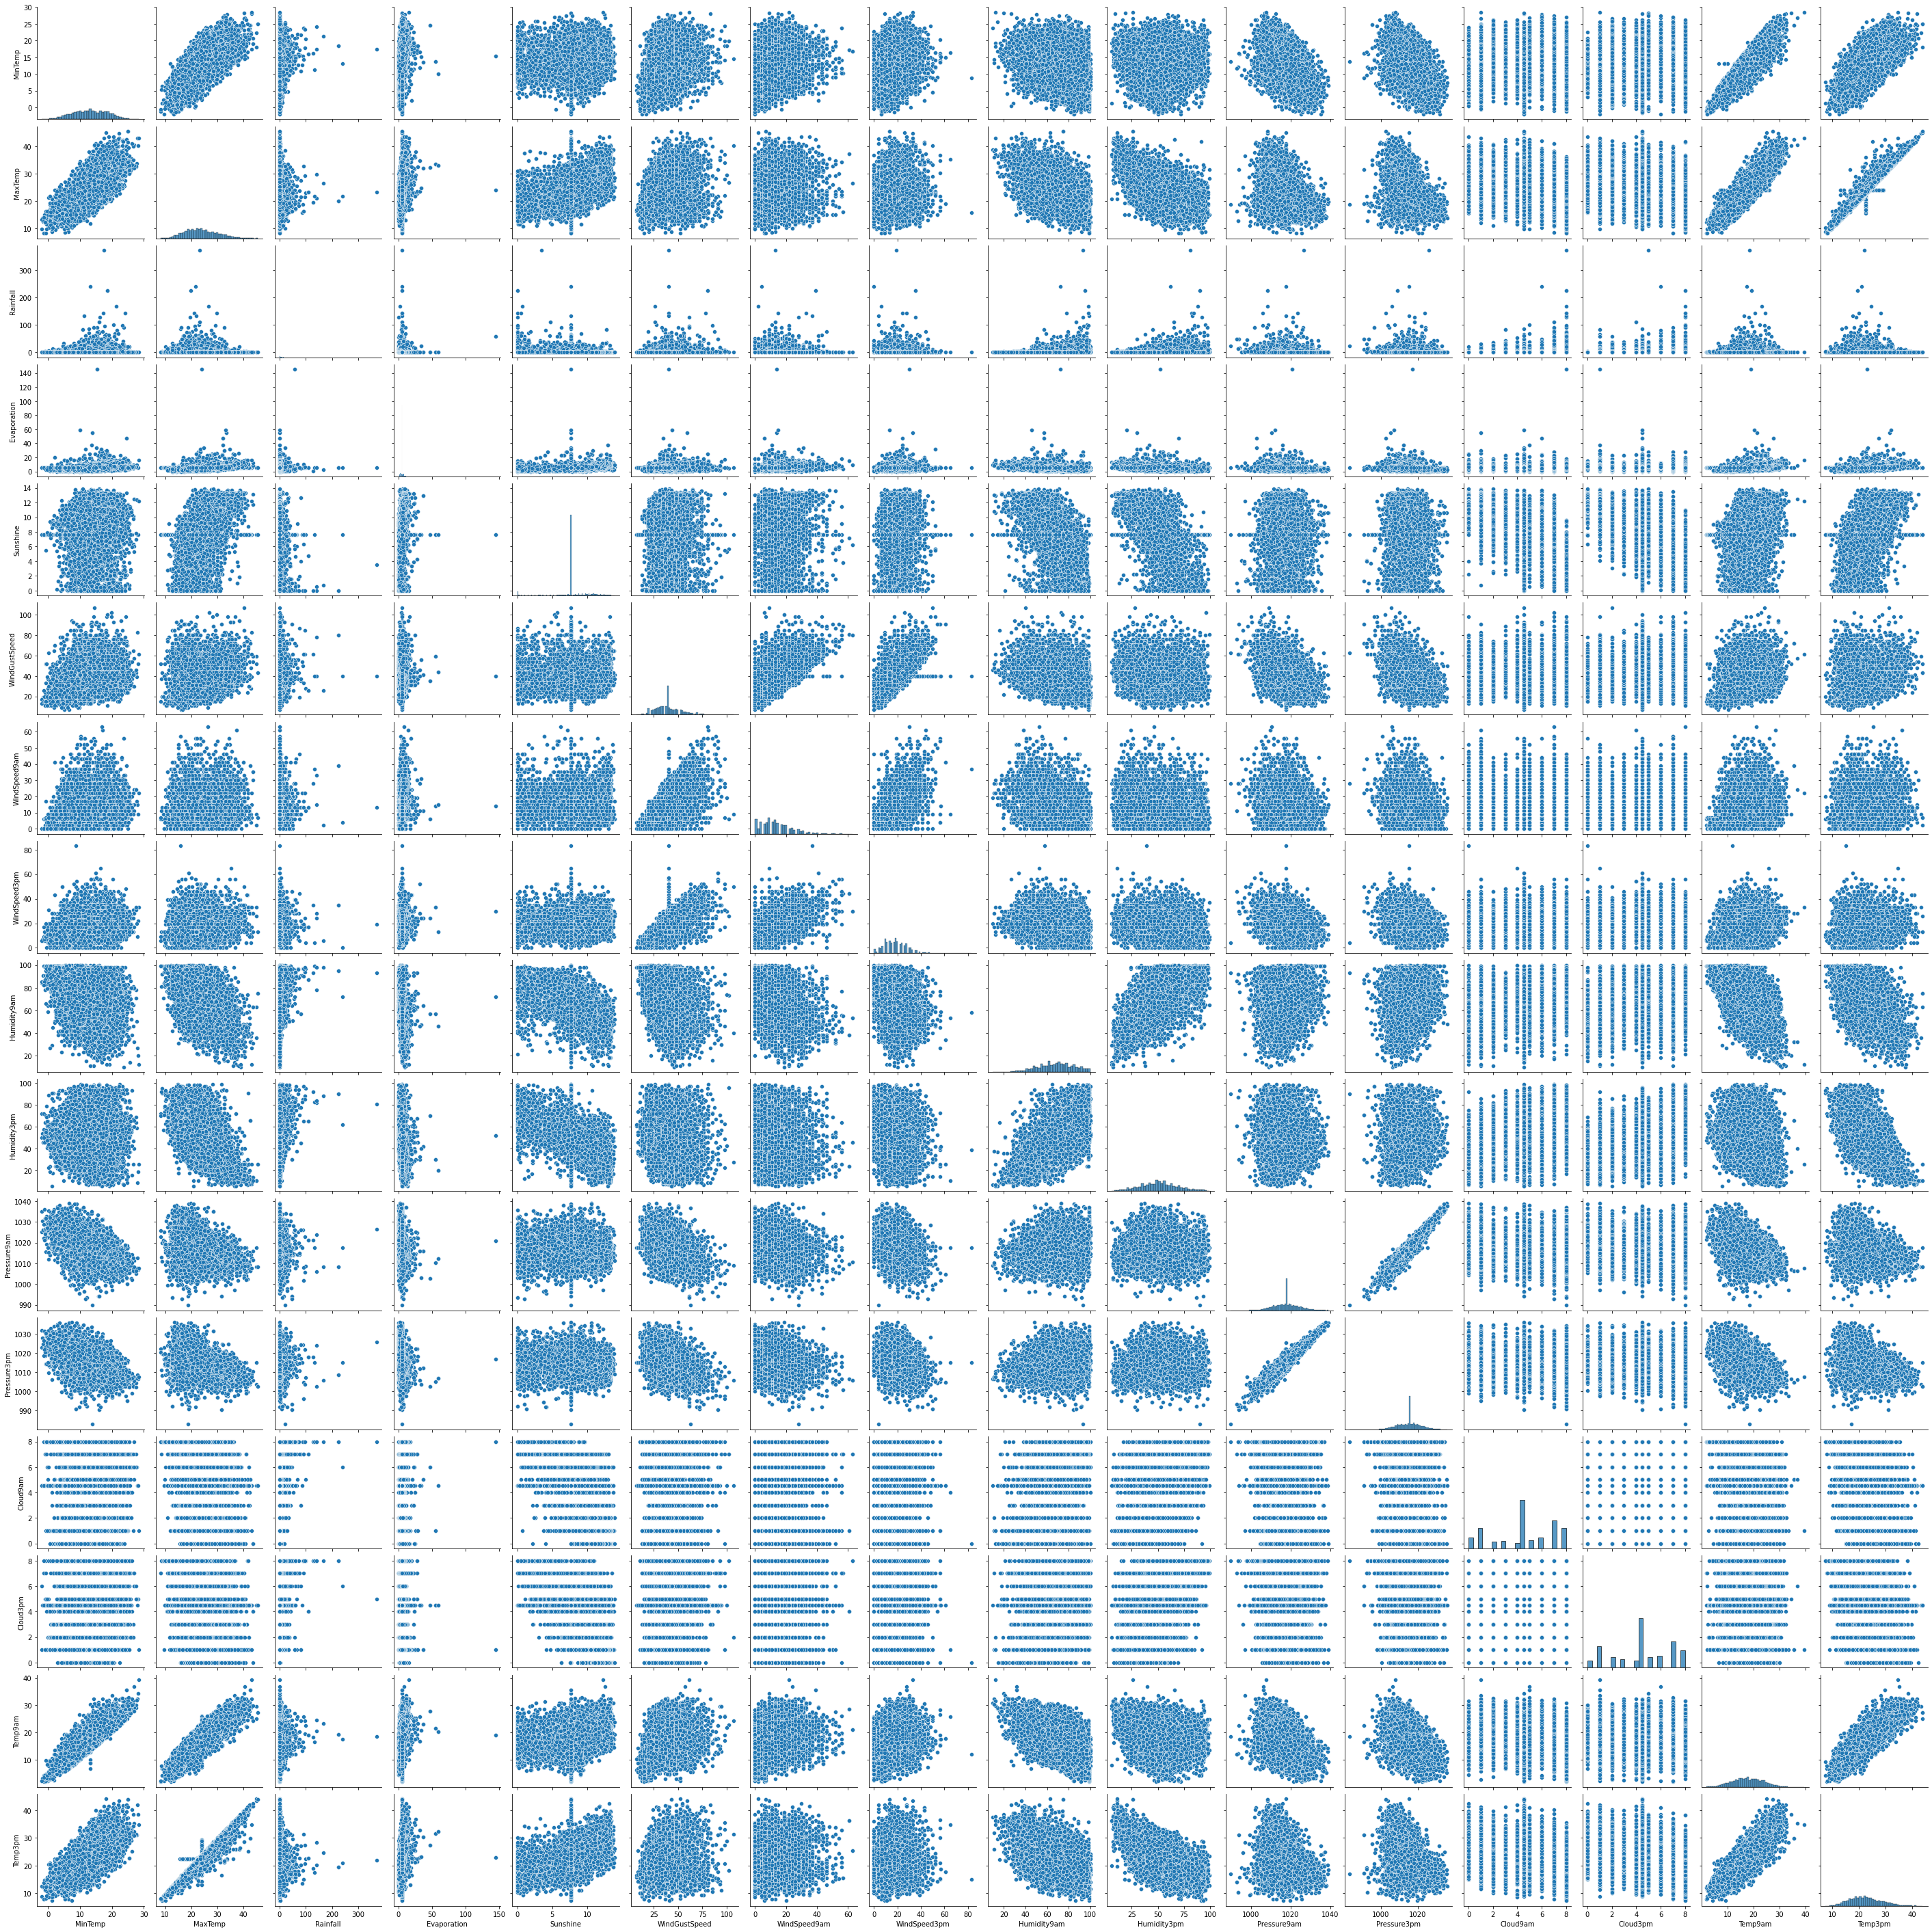

In [38]:
sns.pairplot(df)

# Outliers:

<AxesSubplot:>

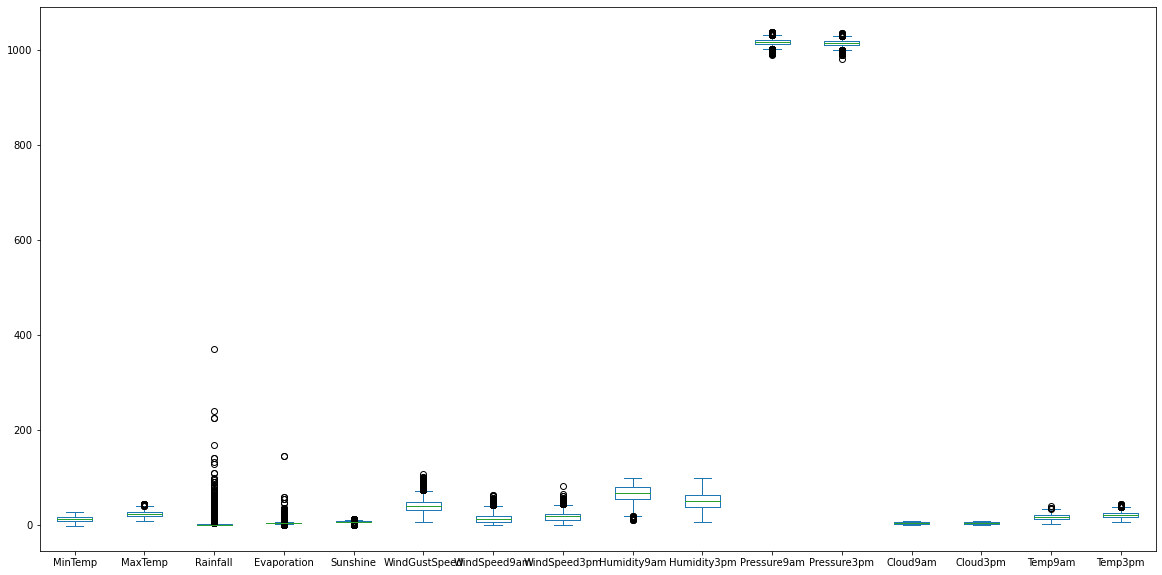

In [39]:
df.plot(kind='box',fontsize=10,figsize=(20,10))

In [40]:
cols = df[['MaxTemp','Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am',
        'Pressure3pm','Temp9am','Temp3pm']]

In [41]:
from scipy.stats import zscore
z=np.abs(zscore(cols))
df_new=df[(z<3).all(axis=1)]
df_new

Date Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0    2008-12-01   Albury     13.4  22.900000       0.6     5.389395  7.632205   
1    2008-12-02   Albury      7.4  25.100000       0.0     5.389395  7.632205   
2    2008-12-03   Albury     12.9  25.700000       0.0     5.389395  7.632205   
3    2008-12-04   Albury      9.2  28.000000       0.0     5.389395  7.632205   
4    2008-12-05   Albury     17.5  32.300000       1.0     5.389395  7.632205   
...         ...      ...      ...        ...       ...          ...       ...   
8420 2017-06-21    Uluru      2.8  23.400000       0.0     5.389395  7.632205   
8421 2017-06-22    Uluru      3.6  25.300000       0.0     5.389395  7.632205   
8422 2017-06-23    Uluru      5.4  26.900000       0.0     5.389395  7.632205   
8423 2017-06-24    Uluru      7.8  27.000000       0.0     5.389395  7.632205   
8424 2017-06-25    Uluru     14.9  23.859976       0.0     5.389395  7.632205   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W      44.000000          W  ...        71.0         22.0   
1            WNW      44.000000        NNW  ...        44.0         25.0   
2            WSW      46.000000          W  ...        38.0         30.0   
3             NE      24.000000         SE  ...        45.0         16.0   
4              W      41.000000        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E      31.000000         SE  ...        51.0         24.0   
8421         NNW      22.000000         SE  ...        56.0         21.0   
8422           N      37.000000         SE  ...        53.0         24.0   
8423          SE      28.000000        SSE  ...        51.0         24.0   
8424           N      40.174469        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1  8.000000  4.503183     16.9     21.8   
1          1010.6       1007.8  4.566622  4.503183     17.2     24.3   
2          1007.6       1008.7  4.566622  2.000000     21.0     23.2   
3          1017.6       1012.8  4.566622  4.503183     18.1     26.5   
4          1010.8       1006.0  7.000000  8.000000     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3  4.566622  4.503183     10.1     22.4   
8421       1023.5       1019.1  4.566622  4.503183     10.9     24.5   
8422       1021.0       1016.8  4.566622  4.503183     12.5     26.1   
8423       1019.4       1016.5  3.000000  2.000000     15.1     26.0   
8424       1020.2       1017.9  8.000000  8.000000     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No            No  

[7987 rows x 23 columns]

In [42]:
df.shape

(8425, 23)

In [43]:
df_new.shape

(7987, 23)

In [44]:
Loss = ((8425-7987)/8425)*100
Loss

5.198813056379822

# Skewness:

In [45]:
df_new.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         3.488446
Evaporation      0.846181
Sunshine        -0.723970
WindGustSpeed    0.506897
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
dtype: float64

In [46]:
sk=["Rainfall","Evaporation","Sunshine","WindSpeed9am"]

In [47]:
from sklearn.preprocessing import PowerTransformer
Scaler=PowerTransformer(method='yeo-johnson')

In [48]:
df_new[sk] = Scaler.fit_transform(df_new[sk].values)

In [49]:
df_new[sk].head()

Rainfall  Evaporation  Sunshine  WindSpeed9am
0  0.617396     0.186311 -0.097439      0.784361
1 -0.693670     0.186311 -0.097439     -0.983463
2 -0.693670     0.186311 -0.097439      0.700314
3 -0.693670     0.186311 -0.097439     -0.063397
4  0.975076     0.186311 -0.097439     -0.541317

In [50]:
df_new.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         0.913570
Evaporation      0.074744
Sunshine        -0.066262
WindGustSpeed    0.506897
WindSpeed9am    -0.111481
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
dtype: float64

# Encoding:

In [51]:
from sklearn.preprocessing import LabelEncoder as LE

In [52]:
cols =['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday','RainTomorrow']

In [53]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cols]=df_new[cols].apply(LE.fit_transform)

In [54]:
df_new.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     0         1     13.4     22.9  0.617396     0.186311 -0.097439   
1     1         1      7.4     25.1 -0.693670     0.186311 -0.097439   
2     2         1     12.9     25.7 -0.693670     0.186311 -0.097439   
3     3         1      9.2     28.0 -0.693670     0.186311 -0.097439   
4     4         1     17.5     32.3  0.975076     0.186311 -0.097439   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0           13           44.0          13  ...         71.0         22.0   
1           14           44.0           6  ...         44.0         25.0   
2           15           46.0          13  ...         38.0         30.0   
3            4           24.0           9  ...         45.0         16.0   
4           13           41.0           1  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.503183     16.9     21.8          0   
1       1010.6       1007.8  4.566622  4.503183     17.2     24.3          0   
2       1007.6       1008.7  4.566622  2.000000     21.0     23.2          0   
3       1017.6       1012.8  4.566622  4.503183     18.1     26.5          0   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 23 columns]

# Correlation:

In [55]:
df_new.corr()

Date  Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
Date           1.000000  0.465769  0.012391  0.103263  0.022366     0.131720   
Location       0.465769  1.000000  0.116694  0.063798  0.025575     0.131179   
MinTemp        0.012391  0.116694  1.000000  0.718598  0.077213     0.372252   
MaxTemp        0.103263  0.063798  0.718598  1.000000 -0.237227     0.472324   
Rainfall       0.022366  0.025575  0.077213 -0.237227  1.000000    -0.197771   
Evaporation    0.131720  0.131179  0.372252  0.472324 -0.197771     1.000000   
Sunshine       0.026397  0.039174  0.087866  0.403083 -0.266915     0.389848   
WindGustDir   -0.094026 -0.037707 -0.154935 -0.237955  0.142840    -0.121155   
WindGustSpeed -0.032144  0.245658  0.231097  0.136337  0.094373     0.184602   
WindDir9am    -0.034627 -0.041030 -0.045231 -0.217160  0.157531    -0.109834   
WindDir3pm    -0.006968 -0.031195 -0.154184 -0.190417  0.120391    -0.038439   
WindSpeed9am  -0.100553  0.242265  0.163453  0.021640  0.048365     0.084657   
WindSpeed3pm  -0.061261  0.231939  0.185976  0.093241  0.049123     0.091522   
Humidity9am    0.093105  0.003725 -0.126383 -0.382687  0.401551    -0.315357   
Humidity3pm   -0.038347  0.059978  0.090208 -0.409560  0.378034    -0.227184   
Pressure9am    0.038821 -0.024265 -0.433113 -0.333569 -0.125495    -0.263061   
Pressure3pm    0.019223 -0.012288 -0.427936 -0.414358 -0.044327    -0.277819   
Cloud9am       0.003365  0.041859  0.089354 -0.252579  0.305191    -0.111289   
Cloud3pm      -0.002297  0.027050  0.036649 -0.248268  0.263722    -0.144923   
Temp9am        0.067901  0.118100  0.888690  0.864864 -0.103803     0.440687   
Temp3pm        0.116206  0.060707  0.687570  0.974957 -0.248837     0.458644   
RainToday     -0.008830  0.002934  0.061728 -0.219747  0.875795    -0.167131   
RainTomorrow  -0.003565  0.009222  0.091021 -0.149708  0.316060    -0.090305   

               Sunshine  WindGustDir  WindGustSpeed  WindDir9am  ...  \
Date           0.026397    -0.094026      -0.032144   -0.034627  ...   
Location       0.039174    -0.037707       0.245658   -0.041030  ...   
MinTemp        0.087866    -0.154935       0.231097   -0.045231  ...   
MaxTemp        0.403083    -0.237955       0.136337   -0.217160  ...   
Rainfall      -0.266915     0.142840       0.094373    0.157531  ...   
Evaporation    0.389848    -0.121155       0.184602   -0.109834  ...   
Sunshine       1.000000    -0.112272       0.023451   -0.082335  ...   
WindGustDir   -0.112272     1.000000       0.005465    0.405681  ...   
WindGustSpeed  0.023451     0.005465       1.000000   -0.069460  ...   
WindDir9am    -0.082335     0.405681      -0.069460    1.000000  ...   
WindDir3pm    -0.073518     0.507292       0.076737    0.243622  ...   
WindSpeed9am   0.027018     0.080254       0.538612    0.140316  ...   
WindSpeed3pm   0.062445     0.108357       0.628452    0.058887  ...   
Humidity9am   -0.392096     0.031081      -0.263933    0.009571  ...   
Humidity3pm   -0.439592     0.051061      -0.085009    0.117910  ...   
Pressure9am   -0.012336    -0.095047      -0.377284   -0.003943  ...   
Pressure3pm   -0.074037    -0.008263      -0.336132    0.081400  ...   
Cloud9am      -0.543857     0.123415       0.013678    0.092396  ...   
Cloud3pm      -0.555038     0.093527       0.064375    0.062637  ...   
Temp9am        0.285620    -0.185080       0.198936   -0.101576  ...   
Temp3pm        0.418462    -0.249791       0.101786   -0.224390  ...   
RainToday     -0.223070     0.121709       0.076677    0.149239  ...   
RainTomorrow  -0.315207     0.044378       0.181478    0.027091  ...   

               Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Date              0.093105    -0.038347     0.038821     0.019223  0.003365   
Location          0.003725     0.059978    -0.024265    -0.012288  0.041859   
MinTemp          -0.126383     0.090208    -0.433113    -0.427936  0.089354   
MaxTemp          -0.382687    -0.409560    -0.333569 

<AxesSubplot:>

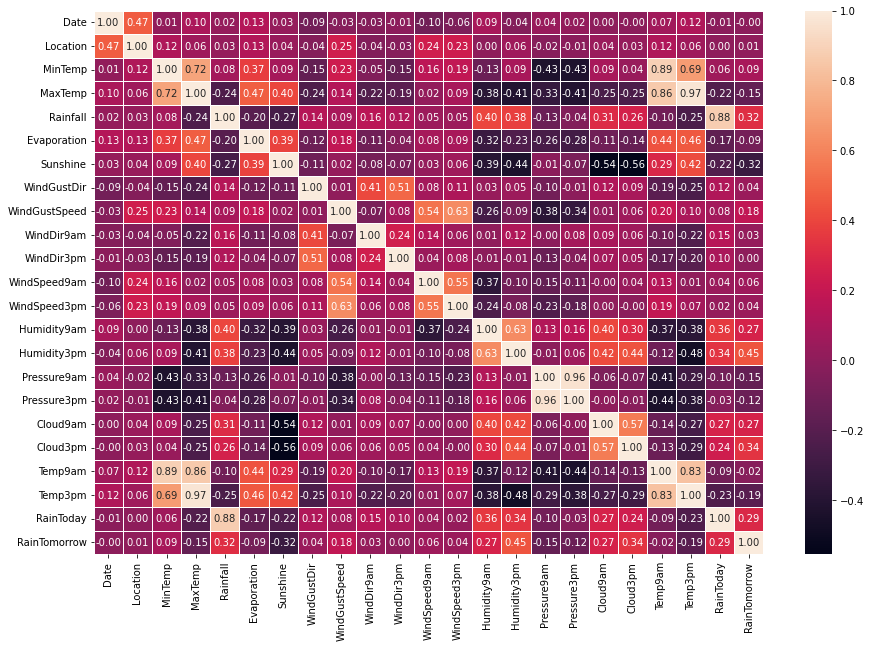

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(),annot=True,linewidth=0.5,fmt='.2f')

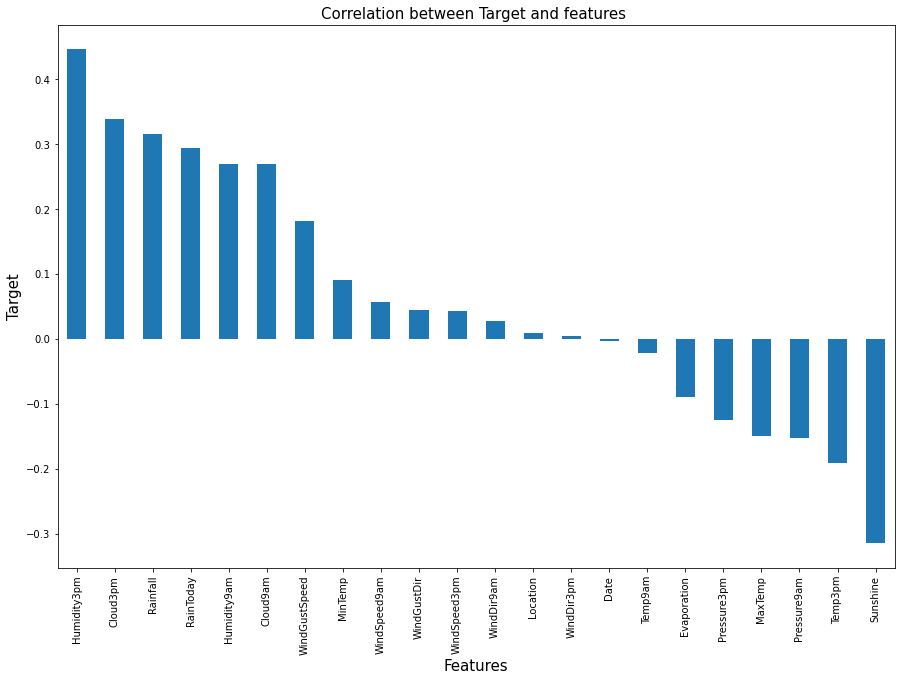

In [57]:
plt.figure(figsize=(15,10))
df_new.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.xticks(rotation=90)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()

# Seperating the columns into features and target as X and Y:

In [58]:
x = df_new.drop('RainTomorrow',axis=1)
y= df_new['RainTomorrow']

In [59]:
y.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

# Balancing the Data: 

In [60]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [61]:
y.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

# Scaling:

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

Date  Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
0     -1.519118 -1.523946 -0.007247 -0.053749  0.390573     0.266714   
1     -1.517929 -1.523946 -1.143523  0.321010 -0.882641     0.266714   
2     -1.516740 -1.523946 -0.101937  0.423216 -0.882641     0.266714   
3     -1.515551 -1.523946 -0.802640  0.815010 -0.882641     0.266714   
4     -1.514362 -1.523946  0.769208  1.547493  0.737926     0.266714   
...         ...       ...       ...       ...       ...          ...   
12325 -1.509607 -1.523946 -0.562568  1.426340 -0.882641     0.266714   
12326 -0.717868 -0.880763  0.635434 -0.904386  1.510072    -0.269739   
12327 -0.654861 -1.523946  0.741544 -0.076836  1.249277     0.266714   
12328 -1.251638  1.370375 -0.838881 -1.645796 -0.882641     0.088842   
12329  1.506374  1.370375  0.182496 -0.107105  0.729462     0.822349   

       Sunshine  WindGustDir  WindGustSpeed  WindDir9am  ...  WindSpeed3pm  \
0      0.108685     1.296689       0.246697    1.322404  ...      0.604289   
1      0.108685     1.521041       0.246697   -0.276619  ...      0.388318   
2      0.108685     1.745392       0.400740    1.322404  ...      0.820261   
3      0.108685    -0.722474      -1.293743    0.408676  ...     -1.015497   
4      0.108685     1.296689       0.015631   -1.418779  ...      0.172346   
...         ...          ...            ...         ...  ...           ...   
12325  0.108685    -0.498122       2.220456    0.408676  ...      0.543321   
12326 -2.003188    -0.946825      -0.076701    1.093972  ...     -1.007575   
12327  0.108685    -0.498122       0.367959   -0.733483  ...     -0.321623   
12328  0.017866     0.174932       1.141585    1.093972  ...      0.641582   
12329 -0.387436     1.072338       0.330943   -0.276619  ...     -0.583554   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         0.005724    -1.841300    -1.614291    -1.331062  1.311878 -0.212842   
1        -1.682227    -1.680443    -1.121228    -1.211339 -0.173856 -0.212842   
2        -2.057327    -1.412348    -1.631294    -1.057410 -0.173856 -1.348753   
3        -1.619710    -2.163014     0.068924    -0.356177 -0.173856 -0.212842   
4         0.693408    -1.251491    -1.087224    -1.519198  0.879146  1.373967   
...            ...          ...          ...          ...       ...       ...   
12325    -1.729434    -2.393723    -1.307964    -1.748697 -0.173856 -0.212842   
12326     1.545708     1.622300     0.806254     1.023540  1.296004  1.340673   
12327     0.681006     1.765244    -1.301154    -0.951891 -0.173856  0.203534   
12328    -0.641033     0.137974    -0.708275    -0.514035 -1.530447 -0.115021   
12329     1.393489     1.515432     0.229628     0.032493  1.177169  0.281131   

        Temp9am   Temp3pm  RainToday  
0     -0.133694  0.015803  -0.577662  
1     -0.078625  0.452362  -0.577662  
2      0.618917  0.260276  -0.577662  
3      0.086583  0.836533  -0.577662  
4      0.031513  1.395328  -0.577662  
...         ...       ...        ...  
12325  0.203276  1.431917  -0.577662  
12326 -0.096981 -0.769529   1.731115  
12327  0.294875 -0.421622  -0.577662  
12328 -1.167590 -1.475655  -0.577662  
12329  0.139225 -0.247435  -0.577662  

[12330 rows x 22 columns]

# VIF:

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

VIF values       Features
0     1.543172           Date
1     1.578366       Location
2     9.507174        MinTemp
3    25.220287        MaxTemp
4     3.370731       Rainfall
5     1.590493    Evaporation
6     2.036514       Sunshine
7     1.568728    WindGustDir
8     2.228039  WindGustSpeed
9     1.388022     WindDir9am
10    1.465889     WindDir3pm
11    2.095656   WindSpeed9am
12    2.118824   WindSpeed3pm
13    4.251492    Humidity9am
14    6.070165    Humidity3pm
15   19.562159    Pressure9am
16   18.509003    Pressure3pm
17    1.976304       Cloud9am
18    1.906941       Cloud3pm
19   19.316167        Temp9am
20   32.997359        Temp3pm
21    2.736008      RainToday

In [64]:
x.drop('Temp3pm',axis=1,inplace=True)

In [65]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values       Features
0     1.542493           Date
1     1.573738       Location
2     9.432960        MinTemp
3    10.141061        MaxTemp
4     3.370681       Rainfall
5     1.589904    Evaporation
6     2.036324       Sunshine
7     1.563700    WindGustDir
8     2.214923  WindGustSpeed
9     1.386608     WindDir9am
10    1.465202     WindDir3pm
11    2.095014   WindSpeed9am
12    2.114712   WindSpeed3pm
13    3.649254    Humidity9am
14    3.820575    Humidity3pm
15   18.952944    Pressure9am
16   18.005924    Pressure3pm
17    1.974315       Cloud9am
18    1.897629       Cloud3pm
19   17.687718        Temp9am
20    2.735610      RainToday

In [66]:
x.drop('Pressure9am',axis=1,inplace=True)

In [67]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values       Features
0     1.540993           Date
1     1.573723       Location
2     9.306832        MinTemp
3     9.773738        MaxTemp
4     3.325719       Rainfall
5     1.571639    Evaporation
6     2.032254       Sunshine
7     1.546841    WindGustDir
8     2.195905  WindGustSpeed
9     1.367738     WindDir9am
10    1.386208     WindDir3pm
11    2.093754   WindSpeed9am
12    2.099275   WindSpeed3pm
13    3.649128    Humidity9am
14    3.818668    Humidity3pm
15    1.390051    Pressure3pm
16    1.973400       Cloud9am
17    1.896587       Cloud3pm
18   17.632089        Temp9am
19    2.731213      RainToday

In [68]:
x.drop('Temp9am',axis=1,inplace=True)

In [69]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values       Features
0     1.514522           Date
1     1.572895       Location
2     4.671517        MinTemp
3     5.774637        MaxTemp
4     3.325146       Rainfall
5     1.568880    Evaporation
6     2.024075       Sunshine
7     1.545272    WindGustDir
8     2.166217  WindGustSpeed
9     1.367322     WindDir9am
10    1.385438     WindDir3pm
11    2.077247   WindSpeed9am
12    2.062310   WindSpeed3pm
13    2.585351    Humidity9am
14    2.996489    Humidity3pm
15    1.387153    Pressure3pm
16    1.961292       Cloud9am
17    1.893580       Cloud3pm
18    2.730139      RainToday

In [70]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Finding Best Random State:

In [71]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    DTC =DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8921330089213301  on Random_state  132


In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

# Decision Tree Classifier:

In [73]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy_Score is  ',acc)
print('Confusion Matrix is ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report is ','\n',classification_report(y_test,pred))

Accuracy_Score is   0.8876723438767234
Confusion Matrix is  
 [[1094  141]
 [ 136 1095]]
Classification Report is  
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      1235
           1       0.89      0.89      0.89      1231

    accuracy                           0.89      2466
   macro avg       0.89      0.89      0.89      2466
weighted avg       0.89      0.89      0.89      2466



Text(0.5, 1.0, 'Confusion Matrix for DecisionTreeClassifier')

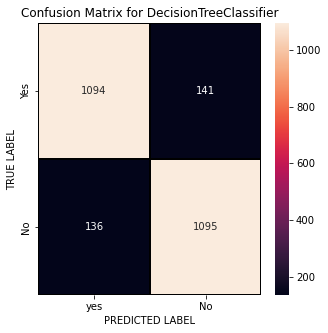

In [74]:
cm = confusion_matrix(y_test,pred)
x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2,linecolor="black",fmt = ".0f",ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for DecisionTreeClassifier')

# Random Forest Classifier:

In [75]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy_Score is ',acc)
print('Confusion_Matrix is ',confusion_matrix(y_test,pred))
print('Classification_Report is ','\n',classification_report(y_test,pred))

Accuracy_Score is  0.9399837793998378
Confusion_Matrix is  [[1167   68]
 [  80 1151]]
Classification_Report is  
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1235
           1       0.94      0.94      0.94      1231

    accuracy                           0.94      2466
   macro avg       0.94      0.94      0.94      2466
weighted avg       0.94      0.94      0.94      2466



Text(0.5, 1.0, 'Confusion Matrix for RandomForestClassifier')

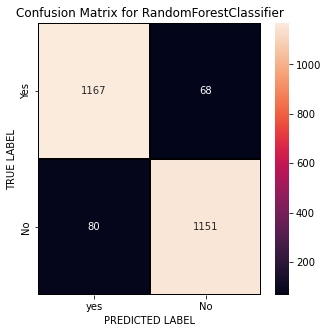

In [76]:
cm = confusion_matrix(y_test,pred)
x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2,linecolor="black",fmt = ".0f",ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')

# KNeighbors Classifier:

In [77]:
kn=KNC()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8799675587996756
[[1009  226]
 [  70 1161]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      1235
           1       0.84      0.94      0.89      1231

    accuracy                           0.88      2466
   macro avg       0.89      0.88      0.88      2466
weighted avg       0.89      0.88      0.88      2466



Text(0.5, 1.0, 'Confusion Matrix for KNeighborClassifier')

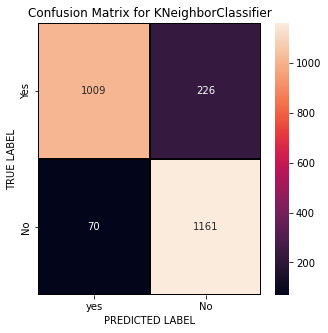

In [78]:
cm = confusion_matrix(y_test,pred)
x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2,linecolor="black",fmt = ".0f",ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNeighborClassifier')

# AdaBoost Classifier:

In [79]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred=ABC.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy_Score is ',acc)
print('Confusion_Matrix is ',confusion_matrix(y_test,pred))
print('Classification_Report is ','\n',classification_report(y_test,pred))

Accuracy_Score is  0.8353609083536091
Confusion_Matrix is  [[1041  194]
 [ 212 1019]]
Classification_Report is  
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1235
           1       0.84      0.83      0.83      1231

    accuracy                           0.84      2466
   macro avg       0.84      0.84      0.84      2466
weighted avg       0.84      0.84      0.84      2466



Text(0.5, 1.0, 'Confusion Matrix for AdaboostClassifier')

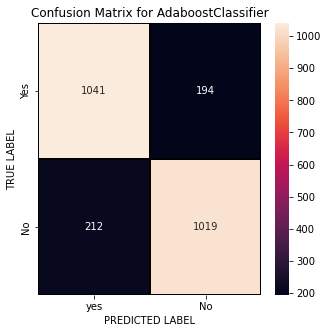

In [80]:
cm = confusion_matrix(y_test,pred)
x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2,linecolor="black",fmt = ".0f",ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaboostClassifier')

# Cross Validation:

In [81]:
from sklearn.model_selection import cross_val_score
for i in range(2,20):
    cr=cross_val_score(DTC,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  2
cross val score =  61.69505271695053
at cv=  3
cross val score =  63.390105433901056
at cv=  4
cross val score =  64.38105292825385
at cv=  5
cross val score =  71.67883211678833
at cv=  6
cross val score =  68.83211678832116
at cv=  7
cross val score =  76.57927602237442
at cv=  8
cross val score =  77.99088216505024
at cv=  9
cross val score =  78.40227088402271
at cv=  10
cross val score =  78.54825628548257
at cv=  11
cross val score =  80.51944431571995
at cv=  12
cross val score =  82.07118090417359
at cv=  13
cross val score =  82.30613273029674
at cv=  14
cross val score =  82.40069947079027
at cv=  15
cross val score =  83.70640713706406
at cv=  16
cross val score =  82.94461780113531
at cv=  17
cross val score =  83.02255823959678
at cv=  18
cross val score =  82.01135442011353
at cv=  19
cross val score =  84.51755387155326


In [82]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(DTC,x,y,cv=19).mean())

0.8433901659072636


In [83]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfc,x,y,cv=19).mean())

0.903974951216997


In [84]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(kn,x,y,cv=19).mean())

0.8232741229321665


In [85]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(ABC,x,y,cv=19).mean())

0.7793223642911422


# Saving the Model:

In [86]:
import pickle
filename ='Rainfall_Prediction.pickle'
pickle.dump(rfc,open(filename,'wb'))

# b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [88]:
df_new

Date  Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0        0         1     13.4  22.900000  0.617396     0.186311 -0.097439   
1        1         1      7.4  25.100000 -0.693670     0.186311 -0.097439   
2        2         1     12.9  25.700000 -0.693670     0.186311 -0.097439   
3        3         1      9.2  28.000000 -0.693670     0.186311 -0.097439   
4        4         1     17.5  32.300000  0.975076     0.186311 -0.097439   
...    ...       ...      ...        ...       ...          ...       ...   
8420  2931         9      2.8  23.400000 -0.693670     0.186311 -0.097439   
8421  2932         9      3.6  25.300000 -0.693670     0.186311 -0.097439   
8422  2933         9      5.4  26.900000 -0.693670     0.186311 -0.097439   
8423  2934         9      7.8  27.000000 -0.693670     0.186311 -0.097439   
8424  2935         9     14.9  23.859976 -0.693670     0.186311 -0.097439   

      WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0              13      44.000000          13  ...         71.0         22.0   
1              14      44.000000           6  ...         44.0         25.0   
2              15      46.000000          13  ...         38.0         30.0   
3               4      24.000000           9  ...         45.0         16.0   
4              13      41.000000           1  ...         82.0         33.0   
...           ...            ...         ...  ...          ...          ...   
8420            0      31.000000           9  ...         51.0         24.0   
8421            6      22.000000           9  ...         56.0         21.0   
8422            3      37.000000           9  ...         53.0         24.0   
8423            9      28.000000          10  ...         51.0         24.0   
8424            3      40.174469           2  ...         62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1  8.000000  4.503183     16.9     21.8   
1          1010.6       1007.8  4.566622  4.503183     17.2     24.3   
2          1007.6       1008.7  4.566622  2.000000     21.0     23.2   
3          1017.6       1012.8  4.566622  4.503183     18.1     26.5   
4          1010.8       1006.0  7.000000  8.000000     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3  4.566622  4.503183     10.1     22.4   
8421       1023.5       1019.1  4.566622  4.503183     10.9     24.5   
8422       1021.0       1016.8  4.566622  4.503183     12.5     26.1   
8423       1019.4       1016.5  3.000000  2.000000     15.1     26.0   
8424       1020.2       1017.9  8.000000  8.000000     15.0     20.9   

      RainToday  RainTomorrow  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  
...         ...           ...  
8420          0             0  
8421          0             0  
8422          0             0  
8423          0             0  
8424          0             0  

[7987 rows x 23 columns]

# Seperating the columns into features and target as X and Y:

In [92]:
X = df_new.drop('Rainfall',axis=1)
Y = df_new["Rainfall"]

# Scaling:

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

Date  Location   MinTemp   MaxTemp  Evaporation  Sunshine  \
0    -1.530550 -1.508427  0.056444 -0.145732     0.186311 -0.097439   
1    -1.529355 -1.508427 -1.058476  0.220676     0.186311 -0.097439   
2    -1.528159 -1.508427 -0.036466  0.320605     0.186311 -0.097439   
3    -1.526963 -1.508427 -0.724000  0.703668     0.186311 -0.097439   
4    -1.525768 -1.508427  0.818306  1.419829     0.186311 -0.097439   
...        ...       ...       ...       ...          ...       ...   
7982  1.974004  1.029423 -1.913248 -0.062457     0.186311 -0.097439   
7983  1.975200  1.029423 -1.764592  0.253986     0.186311 -0.097439   
7984  1.976395  1.029423 -1.430116  0.520464     0.186311 -0.097439   
7985  1.977591  1.029423 -0.984148  0.537119     0.186311 -0.097439   
7986  1.978787  1.029423  0.335174  0.014151     0.186311 -0.097439   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
0        1.229267       0.364103    1.250245    1.400214  ...     0.184123   
1        1.441960       0.364103   -0.277857    1.626597  ...    -1.455097   
2        1.654654       0.520531    1.250245    1.626597  ...    -1.819368   
3       -0.684977      -1.200173    0.377044   -1.769138  ...    -1.394385   
4        1.229267       0.129462   -1.369358   -0.184462  ...     0.851954   
...           ...            ...         ...         ...  ...          ...   
7982    -1.535751      -0.652677    0.377044   -1.542755  ...    -1.030114   
7983    -0.259589      -1.356601    0.377044   -1.089991  ...    -0.726555   
7984    -0.897670      -0.183394    0.377044    1.400214  ...    -0.908690   
7985     0.378492      -0.887318    0.595344   -1.089991  ...    -1.030114   
7986    -0.897670       0.064894   -1.151057   -1.316373  ...    -0.362284   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
0       -1.624174    -1.687142    -1.398115  1.425345  0.013138 -0.138099   
1       -1.457752    -1.202435    -1.279988  0.011773  0.013138 -0.084254   
2       -1.180382    -1.703856    -1.128109  0.011773 -1.076661  0.597788   
3       -1.957019    -0.032451    -0.436219  0.011773  0.013138  0.077282   
4       -1.013959    -1.169007    -1.583744  1.013630  1.535531  0.023437   
...           ...          ...          ...       ...       ...       ...   
7982    -1.513226     1.137532     0.829435  0.011773  0.013138 -1.358595   
7983    -1.679648     0.953678     0.626930  0.011773  0.013138 -1.215007   
7984    -1.513226     0.535827     0.238796  0.011773  0.013138 -0.927832   
7985    -1.513226     0.268402     0.188170 -0.633229 -1.076661 -0.461172   
7986    -0.847537     0.402114     0.424426  1.425345  1.535531 -0.479120   

       Temp3pm  RainToday  RainTomorrow  
0    -0.098593  -0.542476     -0.543635  
1     0.329747  -0.542476     -0.543635  
2     0.141277  -0.542476     -0.543635  
3     0.706687  -0.542476     -0.543635  
4     1.254963  -0.542476     -0.543635  
...        ...        ...           ...  
7982  0.004208  -0.542476     -0.543635  
7983  0.364014  -0.542476     -0.543635  
7984  0.638152  -0.542476     -0.543635  
7985  0.621019  -0.542476     -0.543635  
7986 -0.252796  -0.542476     -0.543635  

[7987 rows x 22 columns]

# Finding Best Random State:

In [99]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [100]:
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.20,random_state=i)
    LR = LinearRegression()
    LR.fit(X_train,Y_train)
    pred = LR.predict(X_test)
    acc=r2_score(Y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8250278261351321  on Random_state  42


In [101]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=maxRS,test_size=.20)

# Random Forest Regressor:

In [102]:
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)
pred=RFR.predict(X_test)
acc=r2_score(Y_test,pred)
print('R2_Score:',r2_score(Y_test,pred))
print('MAE:',mean_absolute_error(Y_test,pred))
print('MSE:',mean_squared_error(Y_test,pred))

R2_Score: 0.8975148575590671
MAE: 0.19098228445644722
MSE: 0.10183480273968239


# Decision Tree Regressor:

In [105]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,Y_train)
pred=DTR.predict(X_test)
acc=r2_score(Y_test,pred)
print('R2_Score:',r2_score(Y_test,pred))
print('MAE:',mean_absolute_error(Y_test,pred))
print('MSE:',mean_squared_error(Y_test,pred))

R2_Score: 0.7887485882713091
MAE: 0.1784210529253462
MSE: 0.2099108741959304


# KNeighbors Regressor:

In [106]:
KN=KNeighborsRegressor()
KN.fit(X_train,Y_train)
pred=KN.predict(X_test)
acc=r2_score(Y_test,pred)
print('R2_Score:',r2_score(Y_test,pred))
print('MAE:',mean_absolute_error(Y_test,pred))
print('MSE:',mean_squared_error(Y_test,pred))

R2_Score: 0.7896287360197298
MAE: 0.25575418238935593
MSE: 0.2090363115987826


# Linear Regression:

In [107]:
LR = LinearRegression()
LR.fit(X_train,Y_train)
predLR=LR.predict(X_test)
print('R2_score:',r2_score(Y_test,predLR))
print('MAE:',mean_absolute_error(Y_test, predLR))
print('MSE:',mean_squared_error(Y_test, predLR))

R2_score: 0.8250278261351321
MAE: 0.27980801152751417
MSE: 0.1738618533972546


# GradientBoosting Regressor:

In [108]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train,Y_train)
predGBR=GBR.predict(X_test)
print('R2_score:',r2_score(Y_test,predGBR))
print('MAE:',mean_absolute_error(Y_test,predGBR))
print('MSE:',mean_squared_error(Y_test,predGBR))

R2_score: 0.8549889332123888
MAE: 0.24679468701504198
MSE: 0.14409087043908173


# Cross Validation Score:

In [111]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=19, test_size=0.3, random_state=maxRS)
cvs = cross_val_score(LR, X, Y, cv=cv)
print("CV Score of Linear Regression model is ",cvs.mean())

CV Score of Linear Regression model is  0.7920520461271342


In [112]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=19, test_size=0.3, random_state=maxRS)
cvs = cross_val_score(RFR, X, Y, cv=cv)
print("CV Score of Random Forest Regression model is ",cvs.mean())

CV Score of Random Forest Regression model is  0.880447536506278


In [113]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=19, test_size=0.3, random_state=maxRS)
cvs = cross_val_score(DTR, X, Y, cv=cv)
print("CV Score of Decision Tree Regressor is ",cvs.mean())

CV Score of Decision Tree Regressor is  0.771814258454019


In [114]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=19, test_size=0.3, random_state=maxRS)
cvs = cross_val_score(LR, X, Y, cv=cv)
print("CV Score of Linear Regression model is ",cvs.mean())

CV Score of Linear Regression model is  0.7920520461271342


In [115]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=19, test_size=0.3, random_state=maxRS)
cvs = cross_val_score(KN, X, Y, cv=cv)
print("CV Score of KNeighbors regressor is ",cvs.mean())

CV Score of KNeighbors regressor is  0.759508644862596


# Saving the Model:

In [116]:
import pickle 
filename='Amt_of_Rainfall_prediction.pickle'
pickle.dump(RFR,open(filename,'wb'))